In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/swiggy-data-analytics/Mumbai_restaurants.csv')

In [3]:
df.head(5)

,Unnamed: 0,Name,Rating,Specials,Delivery time,Cost,Coupons
0,0,Huber And Holly,5.0,"Ice Cream, Desserts",61 MINS,₹200 FOR TWO,50% off | Use WELCOME50
1,1,Apna Food Court,5.0,"Chinese, Continental",45 MINS,₹450 FOR TWO,50% off | Use WELCOME50
2,2,abCoffee,5.0,"Beverages, Bakery",41 MINS,₹200 FOR TWO,50% off | Use WELCOME50
3,3,OG Juices - Cold Pressed Juices,4.9,Juices,63 MINS,₹200 FOR TWO,50% off | Use WELCOME50
4,4,Spicy Mango,4.9,"South Indian, Sri Lankan, Asian",63 MINS,₹400 FOR TWO,50% off | Use WELCOME50


In [4]:
df.sample(4)

,Unnamed: 0,Name,Rating,Specials,Delivery time,Cost,Coupons
85,85,ITC Hotels - Biryani & Pulao Collection,4.5,Indian,67 MINS,₹1500 FOR TWO,50% off | Use WELCOME50
276,276,Le Cafe (Jewel of Chembur),4.2,"Italian, American, Desserts",66 MINS,₹1200 FOR TWO,50% off | Use WELCOME50
309,309,MAMA CAKES AND BAKERS,4.2,"Bakery, Desserts",50 MINS,₹90 FOR TWO,50% off | Use WELCOME50
302,302,Kung Fu Panda,4.2,"Chinese, Thai, Asian",52 MINS,₹600 FOR TWO,50% off | Use WELCOME50


In [5]:
df.tail(3)

,Unnamed: 0,Name,Rating,Specials,Delivery time,Cost,Coupons
477,477,The Greedyman Pizzeria,4.0,"Pizzas, Italian, Fast Food, Beverages",43 MINS,₹500 FOR TWO,50% off | Use WELCOME50
478,478,Malvani Touch,4.0,"Seafood, Malwani",37 MINS,₹500 FOR TWO,50% off | Use WELCOME50
479,479,Samosa Singh,4.0,"North Indian, Snacks, Desserts, Beverages, Str...",48 MINS,₹150 FOR TWO,50% off | Use WELCOME50


In [6]:
df.columns

Index(['Unnamed: 0', 'Name', 'Rating', 'Specials', 'Delivery time', 'Cost',
       'Coupons'],
      dtype='object')

In [7]:
len(df.columns)

7

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     480 non-null    int64  
 1   Name           480 non-null    object 
 2   Rating         480 non-null    float64
 3   Specials       480 non-null    object 
 4   Delivery time  480 non-null    object 
 5   Cost           480 non-null    object 
 6   Coupons        480 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 26.4+ KB


In [9]:
df.dtypes

Unnamed: 0         int64
Name              object
Rating           float64
Specials          object
Delivery time     object
Cost              object
Coupons           object
dtype: object

In [10]:
df['Cost'] = df['Cost'].str.replace('₹', '').str.replace(' FOR TWO', '').astype(int)


In [11]:
df['Delivery time'] = df['Delivery time'].str.replace(' MINS', '').astype(int)


In [12]:
df.dtypes

Unnamed: 0         int64
Name              object
Rating           float64
Specials          object
Delivery time      int64
Cost               int64
Coupons           object
dtype: object

In [13]:
df.describe()

,Unnamed: 0,Rating,Delivery time,Cost
count,480.000000,480.000000,480.000000,480.000000
mean,239.500000,4.307917,49.258333,433.587500
std,138.708327,0.227861,8.216787,333.074594
min,0.000000,4.000000,27.000000,80.000000
25%,119.750000,4.100000,44.000000,250.000000
50%,239.500000,4.300000,49.000000,350.000000
75%,359.250000,4.400000,55.000000,500.000000
max,479.000000,5.000000,72.000000,3000.000000


In [14]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Rating           0
Specials         0
Delivery time    0
Cost             0
Coupons          0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(480, 7)

In [17]:
#Data cleaning and preprocessing
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.dropna(subset=['Rating'], inplace=True)
print("\n'Rating' column cleaned and converted to numeric.")


'Rating' column cleaned and converted to numeric.


In [18]:
#There is nothing to clean it seems to be cleaned 
# Lets now perform Exploratory Data Analysis (EDA)
print("\n\n --- Exploratory Data Analysis (EDA) --- ")




 --- Exploratory Data Analysis (EDA) --- 


In [19]:
#Descriptive Statistics for numerical columns
print("\nDescriptive Statistics:")
print(df[['Rating', 'Delivery time', 'Cost']].describe())


Descriptive Statistics:
           Rating  Delivery time         Cost
count  480.000000     480.000000   480.000000
mean     4.307917      49.258333   433.587500
std      0.227861       8.216787   333.074594
min      4.000000      27.000000    80.000000
25%      4.100000      44.000000   250.000000
50%      4.300000      49.000000   350.000000
75%      4.400000      55.000000   500.000000
max      5.000000      72.000000  3000.000000


In [20]:
#Let's Analyze the resturant ratings 
print("\n Rating Distribution:")
print(df['Rating'].value_counts().sort_index())
print(f"\nAverage Rating: {df['Rating'].mean():.2f}")
print(f"Median Rating: {df['Rating'].median()}")


 Rating Distribution:
Rating
4.0    65
4.1    71
4.2    71
4.3    88
4.4    77
4.5    38
4.6    26
4.7    18
4.8    16
4.9     7
5.0     3
Name: count, dtype: int64

Average Rating: 4.31
Median Rating: 4.3


In [21]:
#Top 10 most common cuisines
all_cuisines = df['Specials'].str.split(', ').explode()
top_10_cuisines = all_cuisines.value_counts().head(10)
print("\nTop 10 Most Common Cuisines:")
print(top_10_cuisines)


Top 10 Most Common Cuisines:
Specials
Desserts        129
Indian          115
Chinese         113
North Indian     97
Beverages        93
Snacks           86
Fast Food        56
Bakery           48
Biryani          47
Italian          44
Name: count, dtype: int64


In [22]:
#Relationship between rating and cost:
print("\nRelationship between Rating and Cost:")
avg_cost_by_rating = df.groupby('Rating')['Cost'].mean().sort_index()
print("Average Cost by Rating:")
print(avg_cost_by_rating)


Relationship between Rating and Cost:
Average Cost by Rating:
Rating
4.0    390.307692
4.1    467.042254
4.2    408.732394
4.3    460.204545
4.4    420.129870
4.5    421.578947
4.6    506.730769
4.7    536.111111
4.8    346.812500
4.9    354.285714
5.0    283.333333
Name: Cost, dtype: float64


In [23]:
#Most expensive and least expensive resturants
most_expensive = df.sort_values(by='Cost', ascending=False)
least_expensive = df.sort_values(by='Cost', ascending=True)
print("\nTop 5 Most Expensive Resturants:")
print(most_expensive[['Name', 'Cost', 'Rating']])
print("\nTop 5 Least Expensive Resturants:")
print(least_expensive[['Name', 'Cost', 'Rating']])


Top 5 Most Expensive Resturants:
                                     Name  Cost  Rating
385          Gourmet Couch By ITC Maratha  3000     4.1
359          Gourmet Couch By ITC Maratha  3000     4.1
35                                 Kofuku  2200     4.7
261                            Mia Cucina  2000     4.3
36   Origami Japanese & Korean Restaurant  2000     4.7
..                                    ...   ...     ...
123                  Laxman's Om Vada Pav   100     4.4
363                       Chavan Vada Pav   100     4.1
277                  Gupta BhelPuri Stall   100     4.2
309                 MAMA CAKES AND BAKERS    90     4.2
133                  sanjay vadapav stall    80     4.4

[480 rows x 3 columns]

Top 5 Least Expensive Resturants:
                                                Name  Cost  Rating
133                             sanjay vadapav stall    80     4.4
309                            MAMA CAKES AND BAKERS    90     4.2
299                               

In [24]:
#Delievery Time Analysis
print("\nDelievery Time Analysis:")
print(f"Average Delivery Time: {df['Delivery time'].mean():.2f} minutes")
print(f"Longest Delivery Time: {df['Delivery time'].max()} minutes")
print(f"Sortest Delivery Time: {df['Delivery time'].min()} minutes")


Delievery Time Analysis:
Average Delivery Time: 49.26 minutes
Longest Delivery Time: 72 minutes
Sortest Delivery Time: 27 minutes




 --- Visualisations --- 


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


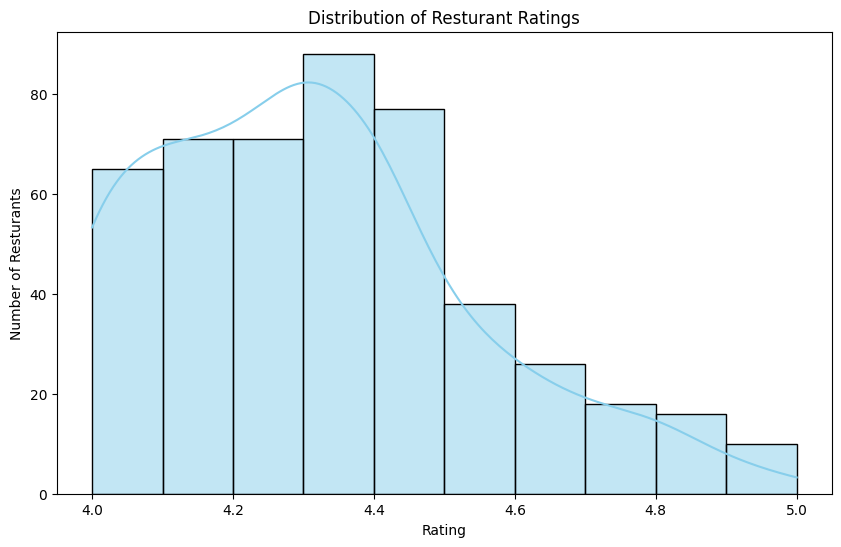

Generated plot: Distribution of Resturant Ratings.


In [25]:
#Visualisation
#Top 10 cuisines bar chart
print("\n\n --- Visualisations --- ")
plt.figure(figsize = (10, 6))
sns.histplot(df['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Resturant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Resturants')
plt.show()
print("Generated plot: Distribution of Resturant Ratings.")

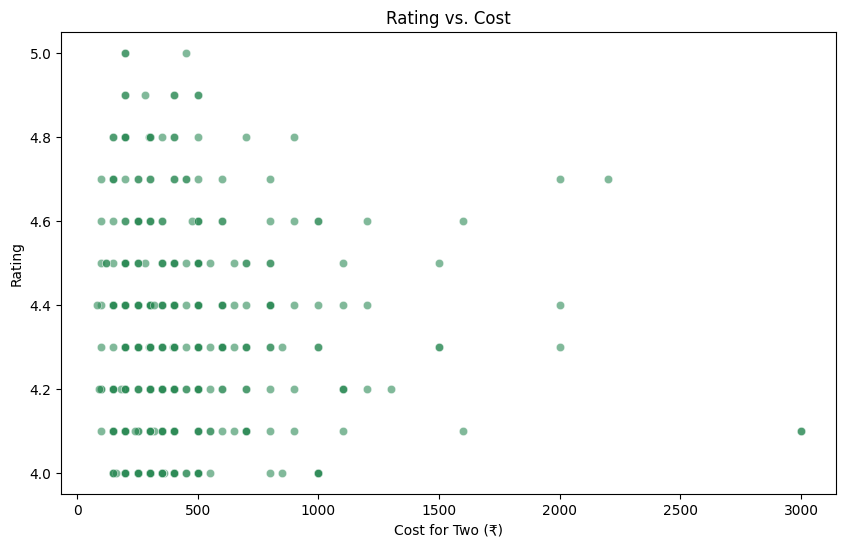

Generated plot: Rating vs. Cost.


In [26]:
#Scatter plot of rating vs. Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost', y='Rating', data=df, alpha=0.6, color='seagreen')
plt.title('Rating vs. Cost')
plt.xlabel('Cost for Two (₹)')
plt.ylabel('Rating')
plt.show()
print("Generated plot: Rating vs. Cost.")

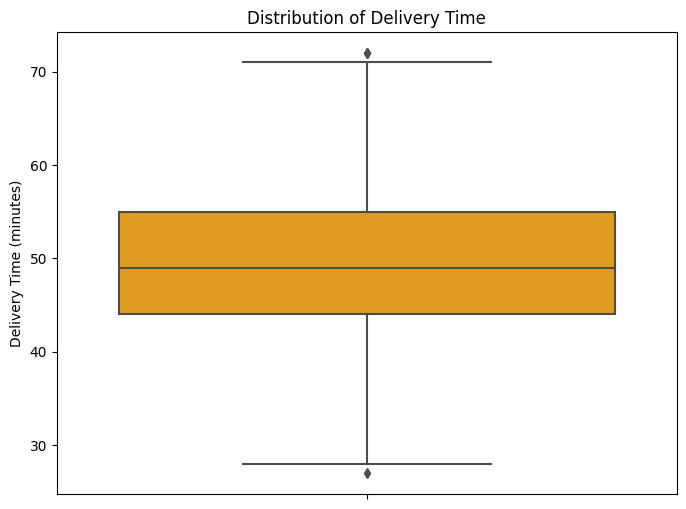

Generated plot: Distribution of Delivery Time.


In [27]:
#Box Plot for delivery Time
plt.figure(figsize=(8, 6))
sns.boxplot(y='Delivery time', data=df, color='orange')
plt.title('Distribution of Delivery Time')
plt.ylabel('Delivery Time (minutes)')
plt.show()
print("Generated plot: Distribution of Delivery Time.")

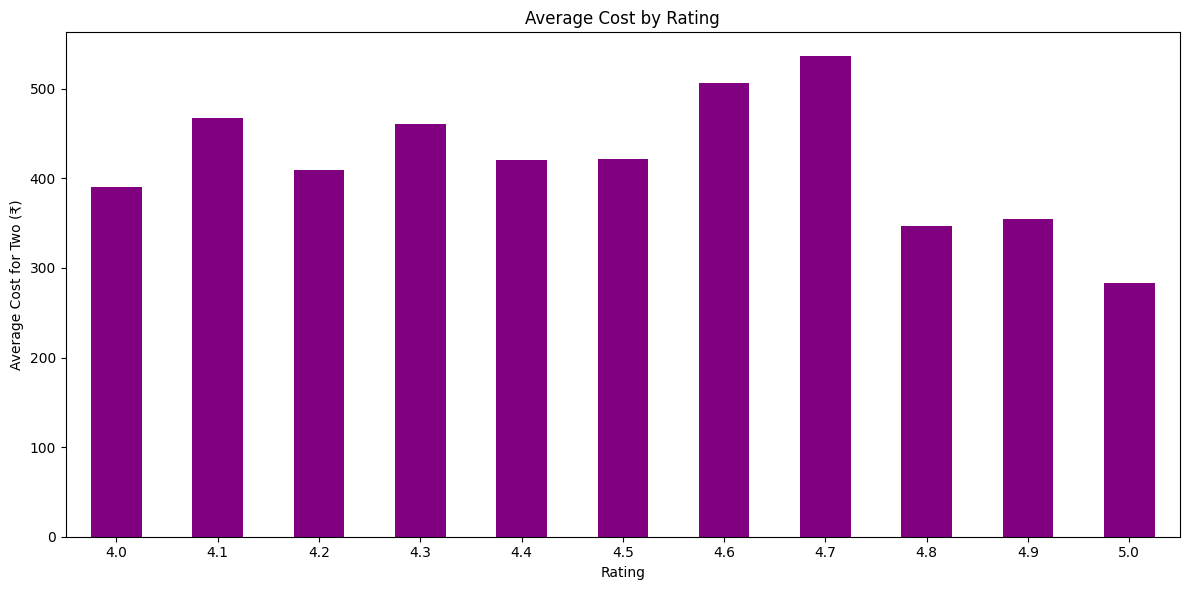

Generated plot: Average Cost by Rating.


In [28]:
# e) Average Cost by Rating (Bar Chart)
plt.figure(figsize=(12, 6))
avg_cost_by_rating.plot(kind='bar', color='purple')
plt.title('Average Cost by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Cost for Two (₹)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("Generated plot: Average Cost by Rating.")